
---

# Problem 1.


In Lecture 04 we considered the heat equation over a homogeneous material for which an iteration is given by the following equation:
$$
f_{i,j} = \frac{f_{i+1,j}+f_{i-1,j} + f_{i,j+1} + f_{i,j-1}}{4} \,.
$$

This was implemented by: 
```
# using iterators to traverse the grid
def iteration_gen(G):
"""the iteration function from lect04"""
    n = G.shape[0]
    indices = product(range(1, n-1), repeat=2)
    for e in indices:
        G[e]=(G[e[0] + 1, e[1]] + G[e[0] - 1, e[1]] + G[e[0], e[1] + 1] + G[e[0], e[1] - 1])/4
```


----

Now imagine, you are given a non-homogeneous material for which the iteration, i.e. the corresponding equation,  depends on the position $(i, j)$ and is given by:
$$
f_{i,j} := \frac{ h_{i + 1,j} f_{i + 1, j} + h_{i - 1,j} f_{i - 1,j} + h_{i,j + 1} f_{i,j+1} + h_{i,j - 1} f_{i,j-1}}{ h_{i + 1,j} + h_{i - 1,j} + h_{i,j + 1} + h_{i,j - 1} } \,.
$$
Here "weight"
$$h(i, j) = \exp\left(-\frac{|i - j|} {\sqrt{n}}\right) \,,$$
corresponds to the point $(i, j)$, where $n$ is the size of the grid.

----

Write a new function:
```
def iteration_gen_nonhomogeneous(G):
    """the iteration function in hw05"""
```
to solve the non-homogeneous case defined as above. 


The task here is to examine run-time improvements that can be obtained by Cython for this non-homogeneous material. Consider **solve_heat_equation4** from Lect04, which now becomes.

```
def solve_heat_nonhomogeneous_equation4(n):
    '''changing to both calc_error_np and iteration_gen functions'''
    G = build_grid(n)
    set_boundary_grid(G)
    
    G_prev = build_grid(n)
    copy_array(G, G_prev)
    
    error = np.float("inf")
    while error > 1e-7:
        iteration_gen_nonhomogeneous(G)
        error = calc_error_np(G, G_prev) 
        copy_array(G, G_prev)          
    return(G)
```

----

Concretely, as presented in Lect05, perform the following steps and measure their run-times:

(i) simply compile the python code with Cython, without any changes;


(ii) introduce variables and arrays with ctypes (by using the command cdef);  


(iii) besides (ii), also use the content of ndarray objects in order to efficiently access the data buffer of the arrays.

---

In the sequel of the notebook, as your solution, submit codes, run-times, and plots of the following tasks:

**2.1 solve_heat_nonhomogeneous_equation4(100)

**2.2 solve_heat_nonhomogeneous_equation4(100) when applied (i)  

**2.3 solve_heat_nonhomogeneous_equation4(100) when applied (ii)  

**2.4 solve_heat_nonhomogeneous_equation4(100) when applied (iii)  

Notice that to obtain a best performance for the heat equation you also need to apply (i), (ii), (iii) to the functions called within "solve_heat_equation4".


In [5]:
%load_ext Cython

In [6]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [7]:
size_of_grid = 100

### Part 1: solve_heat_equation4(100)

In [8]:
from itertools import product
import numpy as np
import matplotlib.pyplot as plt

def build_grid(n):
    '''defines the grid'''
    G = np.zeros((n, n))
    return G

def set_boundary_grid(G):
    '''set the boundary values'''
    n = G.shape[0]
    G[:,  0] = 1.0
    G[0,  :] = 1.0
    G[-1, :] = 1.0
    G[:, -1] = 1.0

def plot_grid(G):
    img = plt.imshow(G)
    img.set_cmap('rainbow')
    plt.axis('off')
    plt.show()

def iteration_gen_nonhomogeneous(G):
    """
        the iteration function in hw05
    
    """
    n = G.shape[0]
    indices = product(range(1, n-1), repeat=2)
    h = lambda i, j: np.exp(np.divide(np.subtract(0, np.abs(i-j)), np.sqrt(n)))
    for e in indices:
        h_ip1 = h(e[0]+1, e[1])
        h_im1 = h(e[0]-1, e[1])
        h_jp1 = h(e[0], e[1]+1)
        h_jm1 = h(e[0], e[1]-1)
        numerator = h_ip1*G[e[0]+1, e[1]] + h_im1*G[e[0]-1, e[1]] + h_jp1*G[e[0], e[1]+1] + h_jm1*G[e[0], e[1]-1]
        denominator = h_ip1 + h_im1 + h_jp1 + h_jm1
        G[e] = np.divide(numerator, denominator)
        

# using numpy built-in functions to compute the error
def calc_error_np(G1, G2):
    error = np.square(np.subtract(G1, G2)).mean()
    return(error)

# deep copy of G1 to G2
def copy_array(G1, G2):
    G2[:, :] = G1[:, :]

    
def solve_heat_nonhomogeneous_equation4(n):
    '''changing to both calc_error_np and iteration_gen functions'''
    G = build_grid(n)
    set_boundary_grid(G)
    
    G_prev = build_grid(n)
    copy_array(G, G_prev)
    
    error = np.float("inf")
    while error > 1e-7:
        iteration_gen_nonhomogeneous(G)
        error = calc_error_np(G, G_prev) 
        copy_array(G, G_prev)          
    return(G)

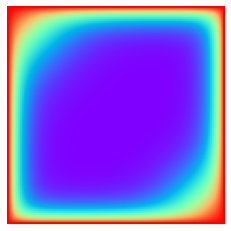

Timer unit: 1e-06 s

Total time: 88.7552 s
File: <ipython-input-8-4743653fa6aa>
Function: solve_heat_nonhomogeneous_equation4 at line 52

Line #      Hits         Time  Per Hit   % Time  Line Contents
    52                                           def solve_heat_nonhomogeneous_equation4(n):
    53                                               '''changing to both calc_error_np and iteration_gen functions'''
    54         1         58.0     58.0      0.0      G = build_grid(n)
    55         1         28.0     28.0      0.0      set_boundary_grid(G)
    56                                               
    57         1        182.0    182.0      0.0      G_prev = build_grid(n)
    58         1         31.0     31.0      0.0      copy_array(G, G_prev)
    59                                               
    60         1          4.0      4.0      0.0      error = np.float("inf")
    61       310        376.0      1.2      0.0      while error > 1e-7:
    62       309   88728866.0 2871

In [9]:
%lprun -f solve_heat_nonhomogeneous_equation4 G = solve_heat_nonhomogeneous_equation4(size_of_grid)
plot_grid(G)

### HERE COPY-PASTE THE OUTPUT FROM LINE-PROFILER:

Total time: 88.7552 s

File: <ipython-input-8-4743653fa6aa>
    
Function: solve_heat_nonhomogeneous_equation4 at line 52

Line #      Hits         Time  Per Hit   % Time  Line Contents
____________________________________________________________________________________________
    52                                           def solve_heat_nonhomogeneous_equation4(n):
    53                                               '''changing to both calc_error_np and iteration_gen functions'''
    54         1         58.0     58.0      0.0      G = build_grid(n)
    55         1         28.0     28.0      0.0      set_boundary_grid(G)
    56                                               
    57         1        182.0    182.0      0.0      G_prev = build_grid(n)
    58         1         31.0     31.0      0.0      copy_array(G, G_prev)
    59                                               
    60         1          4.0      4.0      0.0      error = np.float("inf")
    61       310        376.0      1.2      0.0      while error > 1e-7:
    62       309   88728866.0 287148.4    100.0          iteration_gen_nonhomogeneous(G)
    63       309      22653.0     73.3      0.0          error = calc_error_np(G, G_prev) 
    64       309       3037.0      9.8      0.0          copy_array(G, G_prev)          
    65         1          1.0      1.0      0.0      return(G)

### Part 2: solve_heat_equation4(100) after applying (i)


In [10]:
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [11]:
%%cython
# cython: linetrace=True
# cython: binding=True
# distutils: define_macros=CYTHON_TRACE_NOGIL=1

from itertools import product
import numpy as np
cimport numpy as np
import matplotlib.pyplot as plt

def build_grid(n):
    '''defines the grid'''
    G = np.zeros((n, n))
    return G

def set_boundary_grid(G):
    '''set the boundary values'''
    n = G.shape[0]
    G[:,  0] = 1.0
    G[0,  :] = 1.0
    G[-1, :] = 1.0
    G[:, -1] = 1.0

def plot_grid(G):
    img = plt.imshow(G)
    img.set_cmap('rainbow')
    plt.axis('off')
    plt.show()

def iteration_gen_nonhomogeneous(G):
    """
        the iteration function in hw05
    
    """
    n = G.shape[0]
    indices = product(range(1, n-1), repeat=2)
    h = lambda i, j: np.exp(np.divide(np.subtract(0, np.abs(i-j)), np.sqrt(n)))
    for e in indices:
        h_ip1 = h(e[0]+1, e[1])
        h_im1 = h(e[0]-1, e[1])
        h_jp1 = h(e[0], e[1]+1)
        h_jm1 = h(e[0], e[1]-1)
        numerator = h_ip1*G[e[0]+1, e[1]] + h_im1*G[e[0]-1, e[1]] + h_jp1*G[e[0], e[1]+1] + h_jm1*G[e[0], e[1]-1]
        denominator = h_ip1 + h_im1 + h_jp1 + h_jm1
        G[e] = np.divide(numerator, denominator)
        

# using numpy built-in functions to compute the error
def calc_error_np(G1, G2):
    error = np.square(np.subtract(G1, G2)).mean()
    return(error)

# deep copy of G1 to G2
def copy_array(G1, G2):
    G2[:, :] = G1[:, :]

    
def solve_heat_nonhomogenous_equation4(n):
    '''changing to both calc_error_np and iteration_gen functions'''
    G = build_grid(n)
    set_boundary_grid(G)
    
    G_prev = build_grid(n)
    copy_array(G, G_prev)
    
    error = np.float("inf")
    while error > 1e-7:
        iteration_gen_nonhomogeneous(G)
        error = calc_error_np(G, G_prev) 
        copy_array(G, G_prev)          
    return(G)

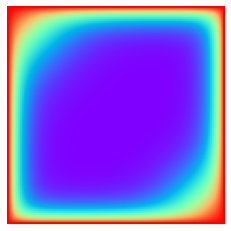

Timer unit: 1e-06 s

Total time: 71.5379 s
File: /Users/sifatraquib/.ipython/cython/_cython_magic_8fb47d3162e6147f31d64e9e54c402a1.pyx
Function: solve_heat_nonhomogenous_equation4 at line 57

Line #      Hits         Time  Per Hit   % Time  Line Contents
    57                                           def solve_heat_nonhomogenous_equation4(n):
    58                                               '''changing to both calc_error_np and iteration_gen functions'''
    59         1         94.0     94.0      0.0      G = build_grid(n)
    60         1         16.0     16.0      0.0      set_boundary_grid(G)
    61                                               
    62         1         42.0     42.0      0.0      G_prev = build_grid(n)
    63         1         61.0     61.0      0.0      copy_array(G, G_prev)
    64                                               
    65         1          2.0      2.0      0.0      error = np.float("inf")
    66         1          0.0      0.0      0.0      w

In [12]:
%lprun -f solve_heat_nonhomogenous_equation4 G = solve_heat_nonhomogenous_equation4(size_of_grid)
plot_grid(G)

### HERE COPY-PASTE THE OUTPUT FROM LINE-PROFILER:

Total time: 71.5379 s

File: /Users/sifatraquib/.ipython/cython/_cython_magic_8fb47d3162e6147f31d64e9e54c402a1.pyx

Function: solve_heat_nonhomogenous_equation4 at line 57

Line #      Hits         Time  Per Hit   % Time  Line Contents
_________________________________________________________________________________________________
    57                                           def solve_heat_nonhomogenous_equation4(n):
    58                                               '''changing to both calc_error_np and iteration_gen functions'''
    59         1         94.0     94.0      0.0      G = build_grid(n)
    60         1         16.0     16.0      0.0      set_boundary_grid(G)
    61                                               
    62         1         42.0     42.0      0.0      G_prev = build_grid(n)
    63         1         61.0     61.0      0.0      copy_array(G, G_prev)
    64                                               
    65         1          2.0      2.0      0.0      error = np.float("inf")
    66         1          0.0      0.0      0.0      while error > 1e-7:
    67       309   71511031.0 231427.3    100.0          iteration_gen_nonhomogeneous(G)
    68       309      23868.0     77.2      0.0          error = calc_error_np(G, G_prev) 
    69       309       2761.0      8.9      0.0          copy_array(G, G_prev)          
    70         1          2.0      2.0      0.0      return(G)

### Part 3: solve_heat_equation4(100) after applying (ii)

In [14]:
%%cython
# cython: linetrace=True
# cython: binding=True
# distutils: define_macros=CYTHON_TRACE_NOGIL=1

from itertools import product
import numpy as np
cimport numpy as np
import matplotlib.pyplot as plt

def build_grid(int n):
    '''defines the grid'''
    cdef np.ndarray G = np.zeros((n, n), dtype=np.float)
    return G

def set_boundary_grid(np.ndarray G):
    '''set the boundary values'''
    cdef int n = G.shape[0]
    G[:,  0] = 1.0
    G[0,  :] = 1.0
    G[-1, :] = 1.0
    G[:, -1] = 1.0

def plot_grid(G):
    img = plt.imshow(G)
    img.set_cmap('rainbow')
    plt.axis('off')
    plt.show()

def iteration_gen_nonhomogeneous(np.ndarray G):
    """
        the iteration function in hw05
    
    """
    cdef int n = G.shape[0]
    indices = product(range(1, n-1), repeat=2)
    cdef int a, b
    h = lambda a, b: np.exp(np.divide(np.subtract(0, np.abs(a-b)), np.sqrt(n)))
    cdef double h_ip1, h_im1, h_jp1, h_jm1, numerator, denominator
    for e in indices:
        h_ip1 = h(e[0]+1, e[1])
        h_im1 = h(e[0]-1, e[1])
        h_jp1 = h(e[0], e[1]+1)
        h_jm1 = h(e[0], e[1]-1)
        numerator = h_ip1*G[e[0]+1, e[1]] + h_im1*G[e[0]-1, e[1]] + h_jp1*G[e[0], e[1]+1] + h_jm1*G[e[0], e[1]-1]
        denominator = h_ip1 + h_im1 + h_jp1 + h_jm1
        G[e] = np.divide(numerator, denominator)
        

# using numpy built-in functions to compute the error
def calc_error_np(np.ndarray G1, np.ndarray G2):
    cdef double error = np.square(np.subtract(G1, G2)).mean()
    return(error)

# deep copy of G1 to G2
def copy_array(np.ndarray G1, np.ndarray G2):
    G2[:, :] = G1[:, :]

    
def solve_heat_nonhomogenous_equation4(int n):
    '''changing to both calc_error_np and iteration_gen functions'''
    cdef np.ndarray G = build_grid(n)
    set_boundary_grid(G)
    cdef np.ndarray G_prev = build_grid(n)
    copy_array(G, G_prev)
    
    cdef double error = np.float("inf")
    while error > 1e-7:
        iteration_gen_nonhomogeneous(G)
        error = calc_error_np(G, G_prev) 
        copy_array(G, G_prev)          
    
    return(G)

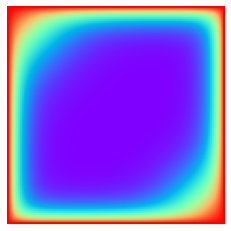

Timer unit: 1e-06 s

Total time: 69.2562 s
File: /Users/sifatraquib/.ipython/cython/_cython_magic_2f9ae2148e6270a6321c9533443d5ae1.pyx
Function: solve_heat_nonhomogenous_equation4 at line 59

Line #      Hits         Time  Per Hit   % Time  Line Contents
    59                                           def solve_heat_nonhomogenous_equation4(int n):
    60                                               '''changing to both calc_error_np and iteration_gen functions'''
    61         1         85.0     85.0      0.0      cdef np.ndarray G = build_grid(n)
    62         1         18.0     18.0      0.0      set_boundary_grid(G)
    63         1         15.0     15.0      0.0      cdef np.ndarray G_prev = build_grid(n)
    64         1         50.0     50.0      0.0      copy_array(G, G_prev)
    65                                               
    66         1          3.0      3.0      0.0      cdef double error = np.float("inf")
    67         1          0.0      0.0      0.0      while e

In [15]:
%lprun -f solve_heat_nonhomogenous_equation4 G = solve_heat_nonhomogenous_equation4(size_of_grid)
plot_grid(G)

### HERE COPY-PASTE THE OUTPUT FROM LINE-PROFILER:

Total time: 69.2562 s

File: /Users/sifatraquib/.ipython/cython/_cython_magic_2f9ae2148e6270a6321c9533443d5ae1.pyx

Function: solve_heat_nonhomogenous_equation4 at line 59

Line #      Hits         Time  Per Hit   % Time  Line Contents
_______________________________________________________________________________________________________________
    59                                           def solve_heat_nonhomogenous_equation4(int n):
    60                                               '''changing to both calc_error_np and iteration_gen functions'''
    61         1         85.0     85.0      0.0      cdef np.ndarray G = build_grid(n)
    62         1         18.0     18.0      0.0      set_boundary_grid(G)
    63         1         15.0     15.0      0.0      cdef np.ndarray G_prev = build_grid(n)
    64         1         50.0     50.0      0.0      copy_array(G, G_prev)
    65                                               
    66         1          3.0      3.0      0.0      cdef double error = np.float("inf")
    67         1          0.0      0.0      0.0      while error > 1e-7:
    68       309   69229258.0 224042.9    100.0          iteration_gen_nonhomogeneous(G)
    69       309      24020.0     77.7      0.0          error = calc_error_np(G, G_prev) 
    70       309       2773.0      9.0      0.0          copy_array(G, G_prev)          
    71                                               
    72         1          1.0      1.0      0.0      return(G)

### Part 4: solve_heat_equation4(100) after applying (iii)

In [16]:
%%cython
# cython: linetrace=True
# cython: binding=True
# distutils: define_macros=CYTHON_TRACE_NOGIL=1

import numpy as np
cimport numpy as np
import matplotlib.pyplot as plt
from itertools import product

def build_grid(int n):
    '''defines the grid'''
    cdef np.ndarray[double, ndim=2] G = np.zeros((n, n), dtype=np.float)
    return G

def set_boundary_grid(np.ndarray[double, ndim=2] G):
    '''set the boundary values'''
    cdef int n = G.shape[0]
    G[:,  0] = 1.0
    G[0,  :] = 1.0
    G[-1, :] = 1.0
    G[:, -1] = 1.0

def plot_grid(G):
    img = plt.imshow(G)
    img.set_cmap('rainbow')
    plt.axis('off')
    plt.show()

def iteration_gen_nonhomogeneous(np.ndarray[double, ndim=2] G):
    """
        the iteration function in hw05
    
    """
    cdef int n = G.shape[0]
    indices = product(range(1, n-1), repeat=2)
    cdef int a, b
    h = lambda a, b: np.exp(np.divide(np.subtract(0, np.abs(a-b)), np.sqrt(n)))
    cdef double h_ip1, h_im1, h_jp1, h_jm1, numerator, denominator
    for e in indices:
        h_ip1 = h(e[0]+1, e[1])
        h_im1 = h(e[0]-1, e[1])
        h_jp1 = h(e[0], e[1]+1)
        h_jm1 = h(e[0], e[1]-1)
        numerator = h_ip1*G[e[0]+1, e[1]] + h_im1*G[e[0]-1, e[1]] + h_jp1*G[e[0], e[1]+1] + h_jm1*G[e[0], e[1]-1]
        denominator = h_ip1 + h_im1 + h_jp1 + h_jm1
        G[e] = np.divide(numerator, denominator)
        

# using numpy built-in functions to compute the error
def calc_error_np(np.ndarray[double, ndim=2] G1, np.ndarray[double, ndim=2] G2):
    cdef double error = np.square(np.subtract(G1, G2)).mean()
    return(error)

# deep copy of G1 to G2
def copy_array(np.ndarray[double, ndim=2] G1, np.ndarray[double, ndim=2] G2):
    G2[:, :] = G1[:, :]

    
def solve_heat_nonhomogenous_equation4(int n):
    '''changing to both calc_error_np and iteration_gen functions'''
    cdef np.ndarray[double, ndim=2] G = build_grid(n)
    set_boundary_grid(G)
    cdef np.ndarray[double, ndim=2] G_prev = build_grid(n)
    copy_array(G, G_prev)
    cdef double error = np.float("inf")
    while error > 1e-7:
        iteration_gen_nonhomogeneous(G)
        error = calc_error_np(G, G_prev) 
        copy_array(G, G_prev)          
    
    return(G)

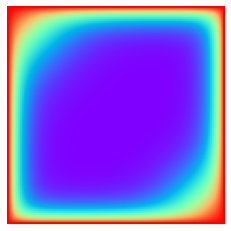

Timer unit: 1e-06 s

Total time: 69.1963 s
File: /Users/sifatraquib/.ipython/cython/_cython_magic_89650f3723d1ffdb27418d0028940ebf.pyx
Function: solve_heat_nonhomogenous_equation4 at line 59

Line #      Hits         Time  Per Hit   % Time  Line Contents
    59                                           def solve_heat_nonhomogenous_equation4(int n):
    60                                               '''changing to both calc_error_np and iteration_gen functions'''
    61         1         87.0     87.0      0.0      cdef np.ndarray[double, ndim=2] G = build_grid(n)
    62         1         14.0     14.0      0.0      set_boundary_grid(G)
    63         1        189.0    189.0      0.0      cdef np.ndarray[double, ndim=2] G_prev = build_grid(n)
    64         1        114.0    114.0      0.0      copy_array(G, G_prev)
    65         1          3.0      3.0      0.0      cdef double error = np.float("inf")
    66         1          1.0      1.0      0.0      while error > 1e-7:
    67   

In [17]:
%lprun -f solve_heat_nonhomogenous_equation4 G = solve_heat_nonhomogenous_equation4(size_of_grid)
plot_grid(G)

### HERE COPY-PASTE THE OUTPUT FROM LINE-PROFILER:

Total time: 69.1963 s

File: /Users/sifatraquib/.ipython/cython/_cython_magic_89650f3723d1ffdb27418d0028940ebf.pyx

Function: solve_heat_nonhomogenous_equation4 at line 59

Line #      Hits         Time  Per Hit   % Time  Line Contents
_________________________________________________________________________________________________________________
    59                                           def solve_heat_nonhomogenous_equation4(int n):
    60                                               '''changing to both calc_error_np and iteration_gen functions'''
    61         1         87.0     87.0      0.0      cdef np.ndarray[double, ndim=2] G = build_grid(n)
    62         1         14.0     14.0      0.0      set_boundary_grid(G)
    63         1        189.0    189.0      0.0      cdef np.ndarray[double, ndim=2] G_prev = build_grid(n)
    64         1        114.0    114.0      0.0      copy_array(G, G_prev)
    65         1          3.0      3.0      0.0      cdef double error = np.float("inf")
    66         1          1.0      1.0      0.0      while error > 1e-7:
    67       309   69167334.0 223842.5    100.0          iteration_gen_nonhomogeneous(G)
    68       309      25485.0     82.5      0.0          error = calc_error_np(G, G_prev) 
    69       309       3039.0      9.8      0.0          copy_array(G, G_prev)          
    70                                               
    71         1          2.0      2.0      0.0      return(G)